In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df_train = pd.read_csv('MNIST_TRAIN.csv')
df_test = pd.read_csv('MNIST_TEST.csv')

In [6]:
print('Number of NaN\'s in the training set: '); print(df_train.isnull().sum().sum());
print('Number of NaN\'s in the test set: '); print(df_test.isnull().sum().sum());

print('----------------------------------------')

print('Shape of training set: '); print(df_train.shape);
print('Shape of test set: '); print(df_test.shape);

print('----------------------------------------')

print('Summary of train set: '); print(df_train.describe().transpose());

print('----------------------------------------')

print('Summary of test set: '); print(df_test.describe().transpose());

Number of NaN's in the training set: 
0
Number of NaN's in the test set: 
0
----------------------------------------
Shape of training set: 
(60000, 785)
Shape of test set: 
(10000, 785)
----------------------------------------
Summary of train set: 
         count      mean      std  min  25%  50%  75%   max
label  60000.0  4.453933  2.88927  0.0  2.0  4.0  7.0   9.0
1x1    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
1x2    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
1x3    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
1x4    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
...        ...       ...      ...  ...  ...  ...  ...   ...
28x24  60000.0  0.002000  0.34660  0.0  0.0  0.0  0.0  62.0
28x25  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
28x26  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
28x27  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
28x28  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0

[785 rows x 8 columns]
-----

In [7]:
X_train = df_train.drop('label', axis = 1)
X_test = df_test.drop('label', axis = 1)

Y_train = df_train[['label']]
Y_test = df_test[['label']]

print(Y_train.head(5)); print(Y_test.head(5))

   label
0      5
1      0
2      4
3      1
4      9
   label
0      7
1      2
2      1
3      0
4      4


In [8]:
#min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit(X_train).transform(X_train)
X_test = standard_scaler.transform(X_test)

In [9]:
mcclf = LinearSVC(verbose = True, loss = 'squared_hinge', max_iter = 5, C=1, dual=True, multi_class='ovr')

In [10]:
mcclf.fit(X_train, Y_train)

[LibLinear]

LinearSVC(C=1, max_iter=5, verbose=True)

In [11]:
predict_train = mcclf.predict(X_train)
predict_test = mcclf.predict(X_test)

In [12]:
print('Confusion Matrix of Train Set:'); print(confusion_matrix(Y_train, predict_train))
print('Classification Report of Train Set:'); print(classification_report(Y_train, predict_train))

print('------------------------------------------')

print('Confusion Matrix of Test Set:'); print(confusion_matrix(Y_test, predict_test))
print('Classification Report of Test Set:'); print(classification_report(Y_test, predict_test))

Confusion Matrix of Train Set:
[[5714    2   27   11   22   26   73   11   33    4]
 [   2 6499   36   35    8   47    9    8   74   24]
 [  98   64 5164  148   73   38  162   45  128   38]
 [  65   45  147 5284   15  294   61   44   82   94]
 [   8   37   68   20 5184   23   59   26   81  336]
 [  86   31   41  201  195 4499  150   44   88   86]
 [  44   32   30    4   30   82 5638    6   47    5]
 [  11   32   74  123   69   25   13 5165   76  677]
 [  77  198  111  401   80  295   56   33 4323  277]
 [  27   15   48  132  152   79   10  284  114 5088]]
Classification Report of Train Set:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5923
           1       0.93      0.96      0.95      6742
           2       0.90      0.87      0.88      5958
           3       0.83      0.86      0.85      6131
           4       0.89      0.89      0.89      5842
           5       0.83      0.83      0.83      5421
           6       0.90

In [13]:
print('Score of the train set: '); print(mcclf.score(X_train, Y_train))
print('Score of the test set: '); print(mcclf.score(X_test, Y_test))

Score of the train set: 
0.8759666666666667
Score of the test set: 
0.8712


In [14]:
Y_train_modified = Y_train.to_numpy()
Y_test_modified = Y_test.to_numpy()

Y_train_modified = np.sort(Y_train_modified, axis=0, kind = 'mergesort')
Y_test_modified = np.sort(Y_test_modified, axis=0, kind = 'mergesort')

print(np.array(np.unique(Y_train_modified, return_counts=True)))
print(np.array(np.unique(Y_test_modified, return_counts=True)))

[[   0    1    2    3    4    5    6    7    8    9]
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]]
[[   0    1    2    3    4    5    6    7    8    9]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]]


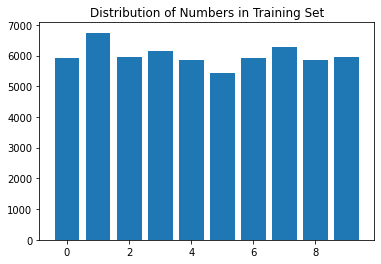

In [15]:
plt.title('Distribution of Numbers in Training Set')
plt.bar(np.array(np.unique(Y_train_modified, return_counts=True))[0], np.array(np.unique(Y_train_modified, return_counts=True))[1])
plt.show()

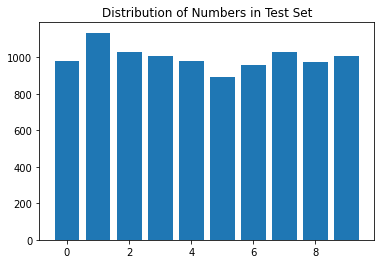

In [16]:
plt.title('Distribution of Numbers in Test Set')
plt.bar(np.array(np.unique(Y_test_modified, return_counts=True))[0], np.array(np.unique(Y_test_modified, return_counts=True))[1])
plt.show()